In [1]:
import torch
from annotator.util import HWC3, resize_image
from dataloaders import CLIC
import tqdm
import numpy as np
from PIL import Image
from torchvision import transforms

/home/ma/anaconda3/envs/torch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
clic = CLIC(root='/home/ma/code/Reproduce-Text-Sketch/image_datasets/CLIC/2020', batch_size=1)

/home/ma/code/Reproduce-Text-Sketch/image_datasets/CLIC/2020


In [3]:
x = clic.train_dset[2][0]

In [7]:
save_dir = '/home/ma/code/Reproduce-Text-Sketch/image_datasets/CLIC_resized/2020/train/train'

In [9]:
for i, x in tqdm.tqdm(enumerate(clic.train_dset), total=len(clic.train_dset)):
    x = x[0]
    x_im = (255*x.permute(1,2,0)).numpy().astype(np.uint8)
    im = resize_image(HWC3(x_im), 512)
    im = Image.fromarray(im)
    im.save(f'{save_dir}/{i:04d}.png')

100%|██████████| 585/585 [01:40<00:00,  5.81it/s]


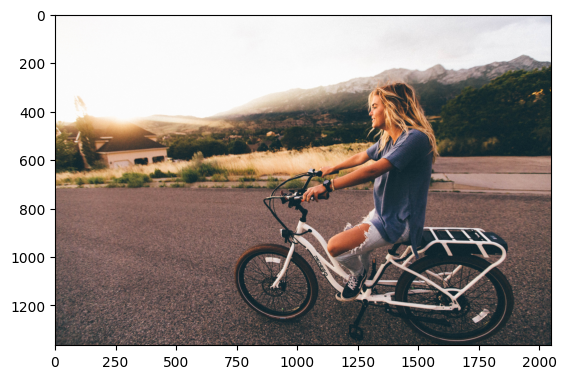

In [13]:
sample = clic.train_dset[0]  # 获取第三个样本
image = sample[0]  # 获取图像数据
import matplotlib.pyplot as plt

plt.imshow(image.permute(1, 2, 0))  # 如果图像是一个PyTorch张量，需要将通道维度移到最后
plt.show()